In [6]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Rutas
ruta = r"C:\Users\uzgre\Codes\Python\Datathon\Reto Oxxo"
archivo_venta = os.path.join(ruta, "Venta.csv")
archivo_meta = os.path.join(ruta, "Meta_venta.csv")
archivo_tienda = os.path.join(ruta, "DIM_TIENDA.csv") 

# === Cargar datasets ===
with open(archivo_venta, 'r', encoding='utf-8', errors='replace') as f:
    ventas = pd.read_csv(f)

with open(archivo_meta, 'r', encoding='utf-8', errors='replace') as f:
    meta = pd.read_csv(f)

with open(archivo_tienda, 'r', encoding='utf-8', errors='replace') as f:
    Tiendas = pd.read_csv(f)


In [7]:
# Determinar la cantidad de registros de cada tienda
print(ventas['TIENDA_ID'].value_counts())

TIENDA_ID
813    21
270    21
990    21
701    21
890    21
       ..
870     4
872     4
874     3
865     2
866     2
Name: count, Length: 1053, dtype: int64


Distribución proporcional de clases:
CLASE_EXITO
Exitosa       0.523502
No exitosa    0.476498
Name: proportion, dtype: float64


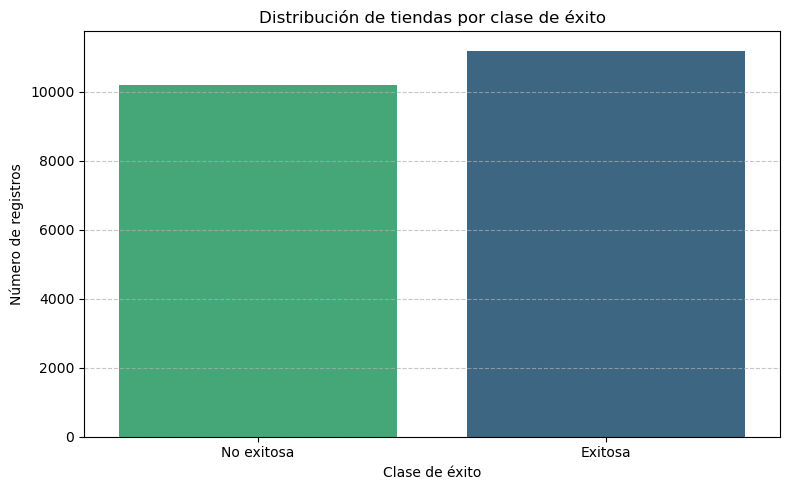

In [8]:
Tiendas = Tiendas[['TIENDA_ID', 'ENTORNO_DES']].drop_duplicates()

# === Unir entorno con ventas
ventas = ventas.merge(Tiendas, on='TIENDA_ID', how='left')

# === Unir con meta por entorno
ventas = ventas.merge(meta, on='ENTORNO_DES', how='left')

# Calcular mediana por entorno
medianas_entorno = ventas.groupby('TIENDA_ID')['VENTA_TOTAL'].median().reset_index()
medianas_entorno.columns = ['TIENDA_ID', 'Mediana_venta']

# Reemplazar la meta por mediana
#ventas = ventas.drop(columns=['Meta_venta'], errors='ignore')  # Por si existe
ventas = ventas.merge(medianas_entorno, on='TIENDA_ID', how='left')

# Calcular nuevo ratio
ventas['ratio'] = ventas['VENTA_TOTAL'] / ventas['Mediana_venta']

# === Clasificación por desempeño
def clasificar_exito(ratio):
    if ratio < 1:
        return 'No exitosa'
    else: 
        return 'Exitosa'


ventas['CLASE_EXITO'] = ventas['ratio'].apply(clasificar_exito)

# === Ver distribución de clases
conteo_clases = ventas['CLASE_EXITO'].value_counts(normalize=True)
print("Distribución proporcional de clases:")
print(conteo_clases)

# === Visualización
plt.figure(figsize=(8, 5))
sns.countplot(data=ventas, x='CLASE_EXITO', hue='CLASE_EXITO',
              order=['No exitosa', 'Exitosa'],
              palette='viridis', legend=False)

plt.title('Distribución de tiendas por clase de éxito')
plt.ylabel('Número de registros')
plt.xlabel('Clase de éxito')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Rutas
ruta = r"C:\Users\uzgre\Codes\Python\Datathon\Reto Oxxo"
archivo_venta = os.path.join(ruta, "Venta.csv")
archivo_meta = os.path.join(ruta, "Meta_venta.csv")
archivo_tienda = os.path.join(ruta, "DIM_TIENDA.csv") 

# === Cargar datasets ===
with open(archivo_venta, 'r', encoding='utf-8', errors='replace') as f:
    ventas = pd.read_csv(f)

with open(archivo_meta, 'r', encoding='utf-8', errors='replace') as f:
    meta = pd.read_csv(f)

with open(archivo_tienda, 'r', encoding='utf-8', errors='replace') as f:
    Tiendas = pd.read_csv(f)


In [10]:
print(ventas.head())

   TIENDA_ID  MES_ID  VENTA_TOTAL
0        813  202404   1042761.16
1        742  202404    604946.96
2        436  202404   2486787.81
3        732  202404    680701.78
4        282  202404   1227768.82


In [11]:
print(meta.head())

  ENTORNO_DES  Meta_venta
0        Base      480000
1       Hogar      490000
2    Peatonal      420000
3      Receso      516000


In [12]:
print(Tiendas.head())

   TIENDA_ID  PLAZA_CVE NIVELSOCIOECONOMICO_DES ENTORNO_DES  MTS2VENTAS_NUM  \
0        126          1                      BC       Hogar          127.42   
1        681          1                       C       Hogar          128.13   
2        117          1                       C        Base           87.62   
3        682          1                       C       Hogar           90.70   
4        275          1                       C       Hogar           95.30   

   PUERTASREFRIG_NUM  CAJONESESTACIONAMIENTO_NUM  LATITUD_NUM  LONGITUD_NUM  \
0                 13                           7     25.69107    -100.21261   
1                 13                           0     25.73571    -100.18086   
2                 11                          11     25.71883    -100.19133   
3                 13                           0     25.66952    -100.20744   
4                 13                           6     25.73766    -100.16116   

  SEGMENTO_MAESTRO_DESC LID_UBICACION_TIENDA DATAS

C:\Users\uzgre\AppData\Local\Temp\ipykernel_9636\2294557998.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=ventas_meta, x='ENTORNO_DES', y='VENTA_TOTAL', ci=None, palette='Blues', label='Promedio de Ventas')
C:\Users\uzgre\AppData\Local\Temp\ipykernel_9636\2294557998.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ventas_meta, x='ENTORNO_DES', y='VENTA_TOTAL', ci=None, palette='Blues', label='Promedio de Ventas')


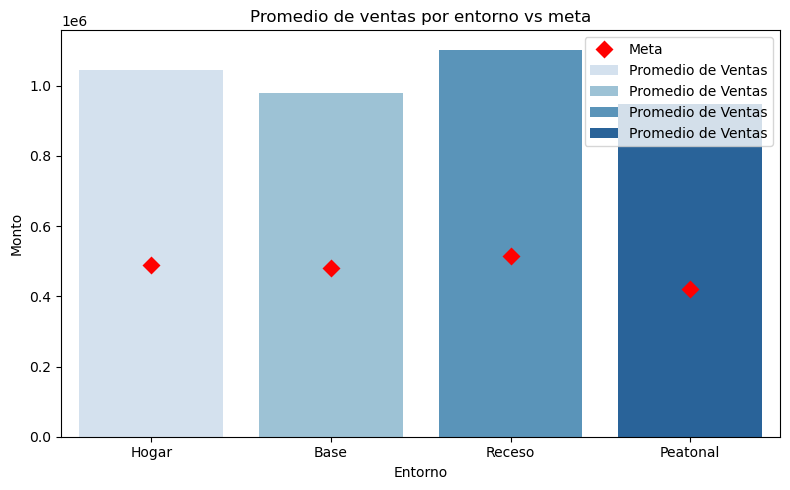

C:\Users\uzgre\AppData\Local\Temp\ipykernel_9636\2294557998.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cumplen, x='ENTORNO_DES', y='Porcentaje', palette='viridis')


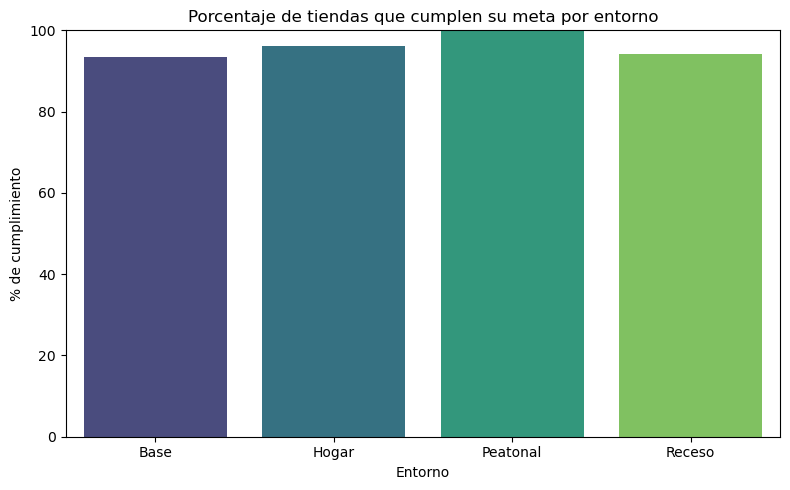

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Unir ENTORNO_DES a ventas ---
ventas = ventas.merge(Tiendas[['TIENDA_ID', 'ENTORNO_DES']], on='TIENDA_ID', how='left')

# --- Agrupar ventas por tienda ---
ventas_prom = ventas.groupby(['TIENDA_ID', 'ENTORNO_DES'])['VENTA_TOTAL'].mean().reset_index()

# --- Unir con metas por entorno ---
ventas_meta = ventas_prom.merge(meta, on='ENTORNO_DES', how='left')

# --- Evaluar cumplimiento de meta ---
ventas_meta['CUMPLE_META'] = ventas_meta['VENTA_TOTAL'] >= ventas_meta['Meta_venta']

# === Gráfico 1: Comparación de ventas promedio vs meta por entorno ===
plt.figure(figsize=(8, 5))
sns.barplot(data=ventas_meta, x='ENTORNO_DES', y='VENTA_TOTAL', ci=None, palette='Blues', label='Promedio de Ventas')
sns.pointplot(data=ventas_meta, x='ENTORNO_DES', y='Meta_venta', color='red', markers='D', linestyles='', label='Meta')
plt.title('Promedio de ventas por entorno vs meta')
plt.ylabel('Monto')
plt.xlabel('Entorno')
plt.legend()
plt.tight_layout()
plt.show()

# === Gráfico 2: Porcentaje de tiendas que cumplen la meta por entorno ===
cumplen = ventas_meta.groupby('ENTORNO_DES')['CUMPLE_META'].mean().reset_index()
cumplen['Porcentaje'] = cumplen['CUMPLE_META'] * 100

plt.figure(figsize=(8, 5))
sns.barplot(data=cumplen, x='ENTORNO_DES', y='Porcentaje', palette='viridis')
plt.title('Porcentaje de tiendas que cumplen su meta por entorno')
plt.ylabel('% de cumplimiento')
plt.xlabel('Entorno')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


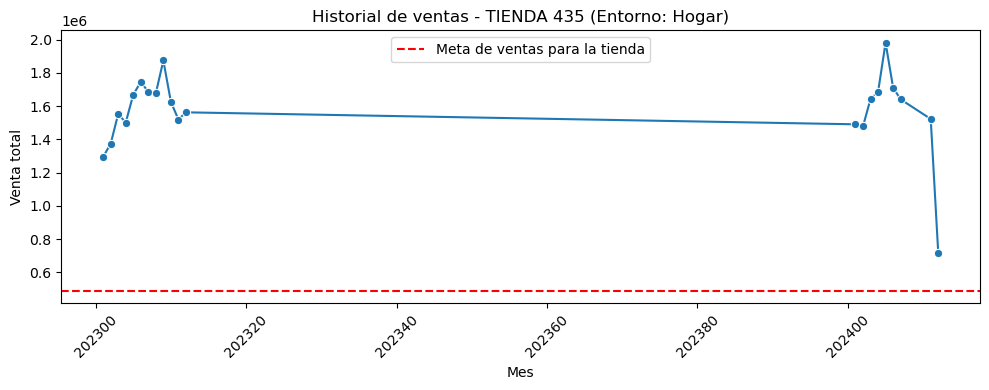

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# ID de la tienda a graficar
tienda_id = 435

# Historial de ventas de esa tienda
historial = ventas[ventas["TIENDA_ID"] == tienda_id]

# 1. Obtener entorno de esa tienda
entorno = historial["ENTORNO_DES"].iloc[0]

# 2. Obtener la meta para ese entorno
meta_entorno = meta.loc[meta["ENTORNO_DES"] == entorno, "Meta_venta"].values[0]

# 3. Graficar
plt.figure(figsize=(10, 4))
sns.lineplot(data=historial, x="MES_ID", y="VENTA_TOTAL", marker="o")
plt.axhline(y=meta_entorno, color='r', linestyle='--', label='Meta de ventas para la tienda')
plt.title(f"Historial de ventas - TIENDA {tienda_id} (Entorno: {entorno})")
plt.xlabel("Mes")
plt.ylabel("Venta total")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

